<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/NextWordPredictorUsingLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Next Word Predictor**

While typing on keyboard of mobile phones,we get the recommendation from our keyboard about the probable next word, it is nothing but the Next Word Predictor.

**Strategy To Build Next Word Predictor**

Next word predictor can be considered as text generator. We will be having a text data to train the model. Let we have dataset as "Hi my name is Nitish. I live in Gurgaon". So our LSTM model is not able to understand the English language input.So we will convert this dataset into vectors and numbers using Text Embedding Techniques as follows:

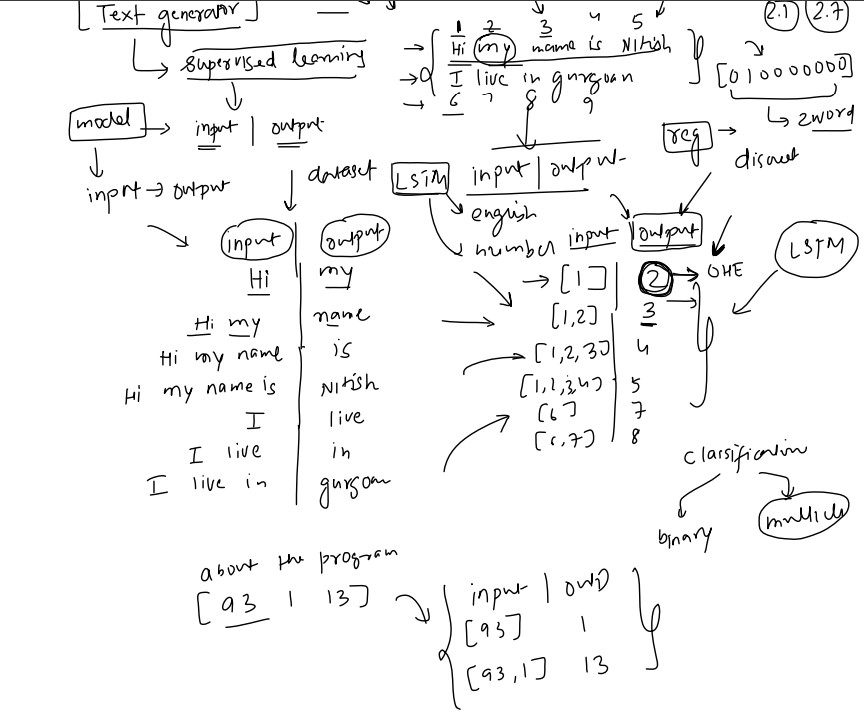

Once we convert the input data into vectors and numbers in input-output format we are good to go for building LSTM model and training it on the embedded dataset.

**Dataset is stored in faqs**

In [1]:
faqs = """About the Program
What is the course fee for  Data Science Mentorship Program (DSMP 2023)
The course follows a monthly subscription model where you have to make monthly payments of Rs 799/month.
What is the total duration of the course?
The total duration of the course is 7 months. So the total course fee becomes 799*7 = Rs 5600(approx.)
What is the syllabus of the mentorship program?
We will be covering the following modules:
Python Fundamentals
Python libraries for Data Science
Data Analysis
SQL for Data Science
Maths for Machine Learning
ML Algorithms
Practical ML
MLOPs
Case studies
You can check the detailed syllabus here - https://learnwith.campusx.in/courses/CampusX-Data-Science-Mentorship-Program-637339afe4b0615a1bbed390
Will Deep Learning and NLP be a part of this program?
No, NLP and Deep Learning both are not a part of this program’s curriculum.
What if I miss a live session? Will I get a recording of the session?
Yes all our sessions are recorded, so even if you miss a session you can go back and watch the recording.
Where can I find the class schedule?
Checkout this google sheet to see month by month time table of the course - https://docs.google.com/spreadsheets/d/16OoTax_A6ORAeCg4emgexhqqPv3noQPYKU7RJ6ArOzk/edit?usp=sharing.
What is the time duration of all the live sessions?
Roughly, all the sessions last 2 hours.
What is the language spoken by the instructor during the sessions?
Hinglish
How will I be informed about the upcoming class?
You will get a mail from our side before every paid session once you become a paid user.
Can I do this course if I am from a non-tech background?
Yes, absolutely.
I am late, can I join the program in the middle?
Absolutely, you can join the program anytime.
If I join/pay in the middle, will I be able to see all the past lectures?
Yes, once you make the payment you will be able to see all the past content in your dashboard.
Where do I have to submit the task?
You don’t have to submit the task. We will provide you with the solutions, you have to self evaluate the task yourself.
Will we do case studies in the program?
Yes.
Where can we contact you?
You can mail us at nitish.campusx@gmail.com
Payment/Registration related questions
Where do we have to make our payments? Your YouTube channel or website?
You have to make all your monthly payments on our website. Here is the link for our website - https://learnwith.campusx.in/
Can we pay the entire amount of Rs 5600 all at once?
Unfortunately no, the program follows a monthly subscription model.
What is the validity of monthly subscription? Suppose if I pay on 15th Jan, then do I have to pay again on 1st Feb or 15th Feb
15th Feb. The validity period is 30 days from the day you make the payment. So essentially you can join anytime you don’t have to wait for a month to end.
What if I don’t like the course after making the payment. What is the refund policy?
You get a 7 days refund period from the day you have made the payment.
I am living outside India and I am not able to make the payment on the website, what should I do?
You have to contact us by sending a mail at nitish.campusx@gmail.com
Post registration queries
Till when can I view the paid videos on the website?
This one is tricky, so read carefully. You can watch the videos till your subscription is valid. Suppose you have purchased subscription on 21st Jan, you will be able to watch all the past paid sessions in the period of 21st Jan to 20th Feb. But after 21st Feb you will have to purchase the subscription again.
But once the course is over and you have paid us Rs 5600(or 7 installments of Rs 799) you will be able to watch the paid sessions till Aug 2024.
Why lifetime validity is not provided?
Because of the low course fee.
Where can I reach out in case of a doubt after the session?
You will have to fill a google form provided in your dashboard and our team will contact you for a 1 on 1 doubt clearance session
If I join the program late, can I still ask past week doubts?
Yes, just select past week doubt in the doubt clearance google form.
I am living outside India and I am not able to make the payment on the website, what should I do?
You have to contact us by sending a mail at nitish.campusx@gmai.com
Certificate and Placement Assistance related queries
What is the criteria to get the certificate?
There are 2 criterias:
You have to pay the entire fee of Rs 5600
You have to attempt all the course assessments.
I am joining late. How can I pay payment of the earlier months?
You will get a link to pay fee of earlier months in your dashboard once you pay for the current month.
I have read that Placement assistance is a part of this program. What comes under Placement assistance?
This is to clarify that Placement assistance does not mean Placement guarantee. So we dont guarantee you any jobs or for that matter even interview calls. So if you are planning to join this course just for placements, I am afraid you will be disappointed. Here is what comes under placement assistance
Portfolio Building sessions
Soft skill sessions
Sessions with industry mentors
Discussion on Job hunting strategies
"""

In [2]:
#We will assign a index to each word in our dataser
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
#Creating the instance of tokenizer
tokenizer = Tokenizer()

In [4]:
tokenizer.fit_on_texts([faqs])

In [5]:
#Checking which index has been assigned to which word
tokenizer.word_index

{'the': 1,
 'you': 2,
 'i': 3,
 'to': 4,
 'a': 5,
 'of': 6,
 'is': 7,
 'have': 8,
 'will': 9,
 'can': 10,
 'what': 11,
 'course': 12,
 'program': 13,
 'in': 14,
 'for': 15,
 'all': 16,
 'sessions': 17,
 'on': 18,
 'be': 19,
 'and': 20,
 'this': 21,
 'if': 22,
 'am': 23,
 'pay': 24,
 'payment': 25,
 'make': 26,
 'we': 27,
 'do': 28,
 'subscription': 29,
 'where': 30,
 'rs': 31,
 'so': 32,
 'campusx': 33,
 'session': 34,
 'our': 35,
 'paid': 36,
 'join': 37,
 'able': 38,
 'your': 39,
 'website': 40,
 'placement': 41,
 'fee': 42,
 'data': 43,
 'monthly': 44,
 'month': 45,
 'not': 46,
 'get': 47,
 'yes': 48,
 'once': 49,
 'past': 50,
 'feb': 51,
 'assistance': 52,
 'science': 53,
 '7': 54,
 '5600': 55,
 'are': 56,
 'watch': 57,
 'google': 58,
 'by': 59,
 'com': 60,
 'mail': 61,
 'from': 62,
 'contact': 63,
 'us': 64,
 'at': 65,
 'or': 66,
 'doubt': 67,
 'mentorship': 68,
 'payments': 69,
 '799': 70,
 'total': 71,
 'duration': 72,
 'months': 73,
 'learning': 74,
 'case': 75,
 'here': 76,
 '

In [6]:
for sentence in faqs.split('\n'):  #This will print the sentences in dataset
  print(sentence)

About the Program
What is the course fee for  Data Science Mentorship Program (DSMP 2023)
The course follows a monthly subscription model where you have to make monthly payments of Rs 799/month.
What is the total duration of the course?
The total duration of the course is 7 months. So the total course fee becomes 799*7 = Rs 5600(approx.)
What is the syllabus of the mentorship program?
We will be covering the following modules:
Python Fundamentals
Python libraries for Data Science
Data Analysis
SQL for Data Science
Maths for Machine Learning
ML Algorithms
Practical ML
MLOPs
Case studies
You can check the detailed syllabus here - https://learnwith.campusx.in/courses/CampusX-Data-Science-Mentorship-Program-637339afe4b0615a1bbed390
Will Deep Learning and NLP be a part of this program?
No, NLP and Deep Learning both are not a part of this program’s curriculum.
What if I miss a live session? Will I get a recording of the session?
Yes all our sessions are recorded, so even if you miss a sessi

In [7]:
#This will print the index of words in each sentence.
#We have represented the sentence in index
for sentence in faqs.split('\n'):
  print(tokenizer.texts_to_sequences([sentence])[0])

[93, 1, 13]
[11, 7, 1, 12, 42, 15, 43, 53, 68, 13, 147, 148]
[1, 12, 94, 5, 44, 29, 95, 30, 2, 8, 4, 26, 44, 69, 6, 31, 70, 45]
[11, 7, 1, 71, 72, 6, 1, 12]
[1, 71, 72, 6, 1, 12, 7, 54, 73, 32, 1, 71, 12, 42, 149, 70, 54, 31, 55, 150]
[11, 7, 1, 96, 6, 1, 68, 13]
[27, 9, 19, 151, 1, 152, 153]
[97, 154]
[97, 155, 15, 43, 53]
[43, 156]
[157, 15, 43, 53]
[158, 15, 159, 74]
[98, 160]
[161, 98]
[162]
[75, 99]
[2, 10, 163, 1, 164, 96, 76, 77, 100, 33, 14, 165, 33, 43, 53, 68, 13, 166]
[9, 101, 74, 20, 102, 19, 5, 78, 6, 21, 13]
[103, 102, 20, 101, 74, 167, 56, 46, 5, 78, 6, 21, 168, 169]
[11, 22, 3, 104, 5, 105, 34, 9, 3, 47, 5, 106, 6, 1, 34]
[48, 16, 35, 17, 56, 170, 32, 107, 22, 2, 104, 5, 34, 2, 10, 171, 172, 20, 57, 1, 106]
[30, 10, 3, 173, 1, 108, 174]
[175, 21, 58, 176, 4, 79, 45, 59, 45, 109, 177, 6, 1, 12, 77, 178, 58, 60, 179, 180, 181, 182, 183, 184, 185]
[11, 7, 1, 109, 72, 6, 16, 1, 105, 17]
[186, 16, 1, 17, 187, 110, 188]
[11, 7, 1, 189, 190, 59, 1, 191, 192, 1, 17]
[193]
[111,

In [8]:
input_sequences = []
for sentence in faqs.split('\n'):
    tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]

    for i in range(1, len(tokenized_sentence)):
        n_gram_sequence = tokenized_sentence[:i+1]
        input_sequences.append(n_gram_sequence)


In [9]:
input_sequences

#This is the input data for our model.
#Number of values in each sentence is not equal.
#Deep learning model expects equal size of input.
#For this we will perform zero padding and make all the sentence of same size.

[[93, 1],
 [93, 1, 13],
 [11, 7],
 [11, 7, 1],
 [11, 7, 1, 12],
 [11, 7, 1, 12, 42],
 [11, 7, 1, 12, 42, 15],
 [11, 7, 1, 12, 42, 15, 43],
 [11, 7, 1, 12, 42, 15, 43, 53],
 [11, 7, 1, 12, 42, 15, 43, 53, 68],
 [11, 7, 1, 12, 42, 15, 43, 53, 68, 13],
 [11, 7, 1, 12, 42, 15, 43, 53, 68, 13, 147],
 [11, 7, 1, 12, 42, 15, 43, 53, 68, 13, 147, 148],
 [1, 12],
 [1, 12, 94],
 [1, 12, 94, 5],
 [1, 12, 94, 5, 44],
 [1, 12, 94, 5, 44, 29],
 [1, 12, 94, 5, 44, 29, 95],
 [1, 12, 94, 5, 44, 29, 95, 30],
 [1, 12, 94, 5, 44, 29, 95, 30, 2],
 [1, 12, 94, 5, 44, 29, 95, 30, 2, 8],
 [1, 12, 94, 5, 44, 29, 95, 30, 2, 8, 4],
 [1, 12, 94, 5, 44, 29, 95, 30, 2, 8, 4, 26],
 [1, 12, 94, 5, 44, 29, 95, 30, 2, 8, 4, 26, 44],
 [1, 12, 94, 5, 44, 29, 95, 30, 2, 8, 4, 26, 44, 69],
 [1, 12, 94, 5, 44, 29, 95, 30, 2, 8, 4, 26, 44, 69, 6],
 [1, 12, 94, 5, 44, 29, 95, 30, 2, 8, 4, 26, 44, 69, 6, 31],
 [1, 12, 94, 5, 44, 29, 95, 30, 2, 8, 4, 26, 44, 69, 6, 31, 70],
 [1, 12, 94, 5, 44, 29, 95, 30, 2, 8, 4, 26, 44, 69, 6

In [10]:
#Checking which sentence is longest.
max_length = max([len(x) for x in input_sequences])

In [11]:
print(max_length)

57


In [12]:
#Now we will do 0 padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_sequences = pad_sequences(input_sequences , maxlen = max_length , padding='pre')


In [13]:
padded_input_sequences
#Obseve that all the sentences are of same length

array([[  0,   0,   0, ...,   0,  93,   1],
       [  0,   0,   0, ...,  93,   1,  13],
       [  0,   0,   0, ...,   0,  11,   7],
       ...,
       [  0,   0,   0, ..., 279,  18, 280],
       [  0,   0,   0, ...,  18, 280, 281],
       [  0,   0,   0, ..., 280, 281, 282]], dtype=int32)

In [14]:
#Now we will segrigate input and output by following logic
x = padded_input_sequences[:,:-1]

In [15]:
x

array([[  0,   0,   0, ...,   0,   0,  93],
       [  0,   0,   0, ...,   0,  93,   1],
       [  0,   0,   0, ...,   0,   0,  11],
       ...,
       [  0,   0,   0, ...,   0, 279,  18],
       [  0,   0,   0, ..., 279,  18, 280],
       [  0,   0,   0, ...,  18, 280, 281]], dtype=int32)

In [16]:
y= padded_input_sequences[:,-1]

In [17]:
y

array([  1,  13,   7,   1,  12,  42,  15,  43,  53,  68,  13, 147, 148,
        12,  94,   5,  44,  29,  95,  30,   2,   8,   4,  26,  44,  69,
         6,  31,  70,  45,   7,   1,  71,  72,   6,   1,  12,  71,  72,
         6,   1,  12,   7,  54,  73,  32,   1,  71,  12,  42, 149,  70,
        54,  31,  55, 150,   7,   1,  96,   6,   1,  68,  13,   9,  19,
       151,   1, 152, 153, 154, 155,  15,  43,  53, 156,  15,  43,  53,
        15, 159,  74, 160,  98,  99,  10, 163,   1, 164,  96,  76,  77,
       100,  33,  14, 165,  33,  43,  53,  68,  13, 166, 101,  74,  20,
       102,  19,   5,  78,   6,  21,  13, 102,  20, 101,  74, 167,  56,
        46,   5,  78,   6,  21, 168, 169,  22,   3, 104,   5, 105,  34,
         9,   3,  47,   5, 106,   6,   1,  34,  16,  35,  17,  56, 170,
        32, 107,  22,   2, 104,   5,  34,   2,  10, 171, 172,  20,  57,
         1, 106,  10,   3, 173,   1, 108, 174,  21,  58, 176,   4,  79,
        45,  59,  45, 109, 177,   6,   1,  12,  77, 178,  58,  6

This x is input and y is output in our aimed format.

Next word prediction is noting but a supervised learning task.We will treat this problem as a multiclass classification task.

In [18]:
#Input shape
x.shape

(863, 56)

In [19]:
#Output shape
y.shape

(863,)

In [20]:
#Checking how many unique words are there
len(tokenizer.word_index)

282

In [21]:
#We are doing one-hot-encoding of the output column i.e. y
from tensorflow.keras.utils import to_categorical
y = to_categorical(y,num_classes=283)
#We have 282 words but we defined value as 283 in to_categorical function becuase
#one-hot-encoding starts from 0 , so for covering the last word with index 282 ,
#we defined value as 283

In [22]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [23]:
y.shape

(863, 283)

**Architecture of LSTM-**

There will be 3 layers in our architecture.First layer is embedding layer.Second layer will be LSTM layer and for getting an output , we will have Dense layer.

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Dropout

In [33]:
model = Sequential()
model.add(Embedding(input_dim=283, output_dim=100, input_shape=(56,)))  # (batch_size, 56, 100)
model.add(LSTM(150, return_sequences=True))  # (batch_size, 56, 150)
model.add(Dropout(0.2))
model.add(LSTM(150, return_sequences=False))  # (batch_size, 150)
model.add(Dropout(0.2))
model.add(Dense(283, activation='softmax'))  # (batch_size, 283)


In [34]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 56, 100)        │        28,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 56, 150)        │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 56, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 150)            │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 283)            │        42,733 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,233 (1.53 MB)

 Trainable params: 402,233 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.fit(x,y,epochs=100)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0483 - loss: 5.5357
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0876 - loss: 5.0669
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0664 - loss: 5.0779
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0715 - loss: 4.9866
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0608 - loss: 5.0601
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0640 - loss: 5.0568
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0844 - loss: 5.0330
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0777 - loss: 4.9667
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0925 - loss: 4.8669
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0947 - loss: 4.7701
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0930 - loss: 4.7273
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc

In [37]:
import time
import numpy as np

In [38]:
#This is the predictive system for next word prediction.
import time
text = "total duration of the course"

for i in range(10):
  # tokenize
  token_text = tokenizer.texts_to_sequences([text])[0]
  # padding
  padded_token_text = pad_sequences([token_text], maxlen=56, padding='pre')
  # predict
  pos = np.argmax(model.predict(padded_token_text))

  for word,index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)
      time.sleep(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
total duration of the course is
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
total duration of the course is 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
total duration of the course is 7 months
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
total duration of the course is 7 months so
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
total duration of the course is 7 months so the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
total duration of the course is 7 months so the total
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
total duration of the course is 7 months so the total course
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
total duration of the course is 7 months so the total course fee
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
total duration of the course is 7 months so the total course fee becomes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
total duration of the course is 7 months so the total course fee becomes 799


**How to improve Performance?**

1) We should use more data

2)Use hyperparameter tunning
   Use drop layer,increase decrease number pf epochs and use advanced architectures like stacked LSTMs or BiDirectional LSTMs or Transformers like GPT and BERT.
